**Can we predict the NBA 2022 Finals?**

*The Goal of this project is to better understand the 2022 NBA Finals Matchup*

In this project we will use a pandas to clean a dataframe, seaborn and pyplot to visualize data, and then sci-kit learn to create decision tree model to see if we can confidently argue towards one winner.

This project uses datasets from the 2021-2022 NBA Season and can be found on basketball-reference.com


In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***Pulling our first dataset***
Loading into Pandas dataframe

In [312]:
nba = pd.read_csv('playoffs/nbaConverted.csv', encoding= 'unicode_escape', sep = ',')

**Data Cleaning**

In [281]:
# remove asterisks from team names
nba["Team"] = nba["Team"].str.replace("*","", regex=False)
nba.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Unnamed: 17,eFG%,TOV%,ORB%,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Boston Celtics,26.1,51.0,31.0,59,23,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,NaN,0.542,12.4,24.0,0.195,NaN,0.502,12.5,77.3,0.183,NaN,TD Garden,727928,17754
1,2.0,Phoenix Suns,27.5,64.0,18.0,59,23,7.50,-0.56,6.94,114.8,107.3,7.5,99.8,0.221,0.354,0.581,NaN,0.549,11.6,22.3,0.176,NaN,0.510,13.0,77.1,0.195,NaN,Phoenix Suns Arena,663171,16175
2,3.0,Utah Jazz,29.3,49.0,33.0,56,26,6.04,-0.37,5.67,116.7,110.5,6.2,97.1,0.271,0.468,0.589,NaN,0.555,12.7,25.4,0.208,NaN,0.521,10.9,78.3,0.164,NaN,Vivint Smart Home Arena,750546,18306
3,4.0,Memphis Grizzlies,24.0,56.0,26.0,55,27,5.68,-0.32,5.37,114.6,109.0,5.6,100.3,0.245,0.346,0.553,NaN,0.522,11.2,30.0,0.180,NaN,0.523,13.3,77.8,0.195,NaN,FedEx Forum,646785,15775
4,5.0,Golden State Warriors,27.6,53.0,29.0,55,27,5.54,-0.02,5.52,112.5,106.9,5.6,98.4,0.235,0.456,0.582,NaN,0.552,13.5,22.8,0.181,NaN,0.509,13.0,78.7,0.201,NaN,Chase Center,740624,18064


In [282]:
# teams.sort_values("Team", inplace = True)
teams_to_keep = [name for name in nba['Team'] if name in ['Golden State Warriors', 'Boston Celtics']]
print('Teams in Finals: ', teams_to_keep)
    
    # Brute Force Method implemented as general case logic not working
    # nba.index selects index of rows which passes condition
    # nba.drop(nba[(nba['Team'] not in teams_to_keep)].index, inplace=True)

# Brute Force Method
nba.drop(nba.index[1:4], inplace = True)
nba.drop(nba.index[2:29], inplace = True)

Teams in Finals:  ['Boston Celtics', 'Golden State Warriors']


In [283]:
# Column Cleaning
nba.drop(columns=['Unnamed: 17', 'Unnamed: 22', 'Unnamed: 27', 'Arena', 'Attend.', 'Attend./G'], inplace = True)
pd.set_option('display.max_columns', None)
nba.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1.0,Boston Celtics,26.1,51.0,31.0,59,23,7.28,-0.26,7.02,114.4,106.9,7.5,96.6,0.239,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183
4,5.0,Golden State Warriors,27.6,53.0,29.0,55,27,5.54,-0.02,5.52,112.5,106.9,5.6,98.4,0.235,0.456,0.582,0.552,13.5,22.8,0.181,0.509,13.0,78.7,0.201


**Heatmap of Advanced Stats for The Finals Teams**

<AxesSubplot:>

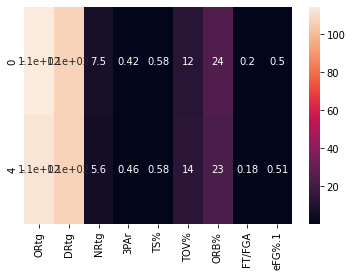

In [284]:
# Quick heatmap visualization for comparison
correlation = (nba[['ORtg', 'DRtg', 'NRtg', '3PAr', 'TS%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1']])
sns.heatmap(correlation, annot=True)

As we can see, both teams appear to have relatively similar advanced statistics, with the only clear difference in their ratings. 

After our first glance, I will pull two more datasets for each Finals team in order to create our model


In [285]:
# Reading the csvs
Warriors = pd.read_csv('playoffs/Warriors.csv')
Celtics = pd.read_csv('playoffs/Celtics.csv')
Warriors.head()
Celtics.head()

,Rk,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 24,FG.1,FGA.1,FG%.1,3P.1,3PA.1,3P%.1,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,1,2022-04-17,NaN,BRK,W,115,114,42,89,0.472,12,33,0.364,19,24,0.792,14,43,24,12,5,14,24,NaN,42,78,0.538,11,24,0.458,19,24,0.792,5,29,20,12,6,16,26
1,2,2,2022-04-20,NaN,BRK,W,114,107,39,75,0.520,11,31,0.355,25,31,0.806,7,36,27,7,4,14,27,NaN,35,76,0.461,10,21,0.476,27,34,0.794,9,36,16,8,8,14,28
2,3,3,2022-04-23,@,BRK,W,109,103,42,84,0.500,12,39,0.308,13,14,0.929,13,34,26,13,3,14,19,NaN,39,77,0.506,12,29,0.414,13,16,0.813,12,33,25,7,5,18,22
3,4,4,2022-04-25,@,BRK,W,116,112,42,89,0.472,14,35,0.400,18,22,0.818,10,45,26,3,4,13,28,NaN,41,81,0.506,13,35,0.371,17,29,0.586,8,38,28,5,7,10,23
4,5,5,2022-05-01,NaN,MIL,L,89,101,28,84,0.333,18,50,0.360,15,20,0.750,10,48,21,8,7,18,25,NaN,37,90,0.411,12,34,0.353,15,21,0.714,10,54,22,11,5,13,21


**More Data Cleaning**

In [286]:
# can also use .select(columns to keep)
Celtics.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24'], inplace = True)
Warriors.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24'], inplace = True)
Warriors.head()

,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,FG.1,FGA.1,FG%.1,3P.1,3PA.1,3P%.1,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,W,123,107,43,82,0.524,16,35,0.457,21,29,0.724,10,41,33,5,8,12,22,43,93,0.462,11,35,0.314,10,13,0.769,9,35,26,8,3,10,22
1,W,126,106,46,84,0.548,17,40,0.425,17,24,0.708,6,35,27,10,8,9,20,37,87,0.425,13,36,0.361,19,21,0.905,17,47,20,4,4,16,25
2,W,118,113,41,74,0.554,18,40,0.450,18,28,0.643,4,30,29,7,6,16,25,40,80,0.500,11,26,0.423,22,27,0.815,11,44,25,9,3,17,26
3,L,121,126,43,86,0.500,12,34,0.353,23,32,0.719,9,36,26,15,3,15,27,41,73,0.562,15,31,0.484,29,36,0.806,5,33,28,9,2,20,31
4,W,102,98,37,82,0.451,13,31,0.419,15,21,0.714,6,37,28,10,6,9,22,36,81,0.444,6,29,0.207,20,29,0.690,14,50,26,5,5,14,21


In [287]:
Celtics.shape
# Celtics.head()

(19, 35)

**Warriors/Celtics Playoff Match Outcomes vs Shooting Performance**

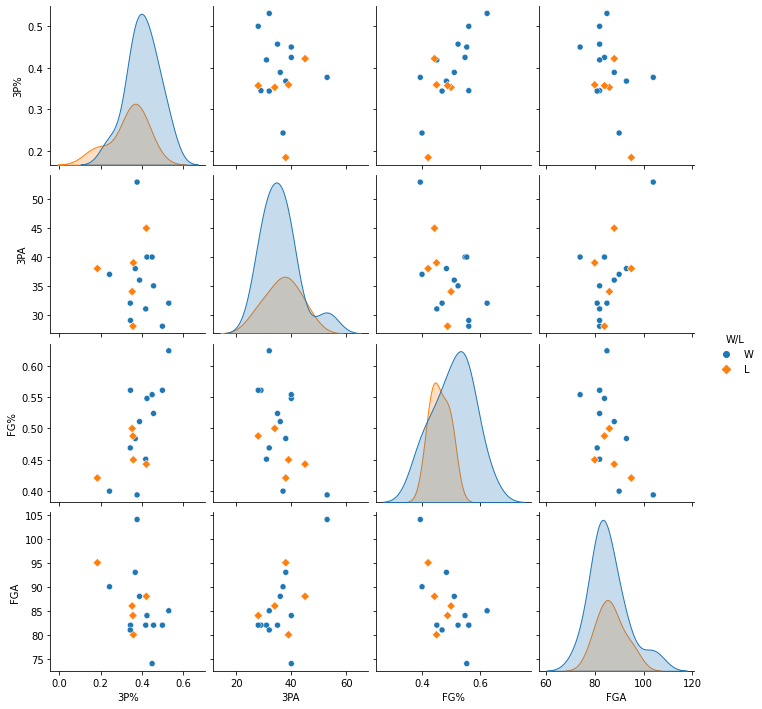

In [288]:
# using seaborn
sns.pairplot(Warriors[['W/L', '3P%', '3PA', 'FG%', 'FGA'
]], hue = 'W/L', markers= ["o", "D"]) 

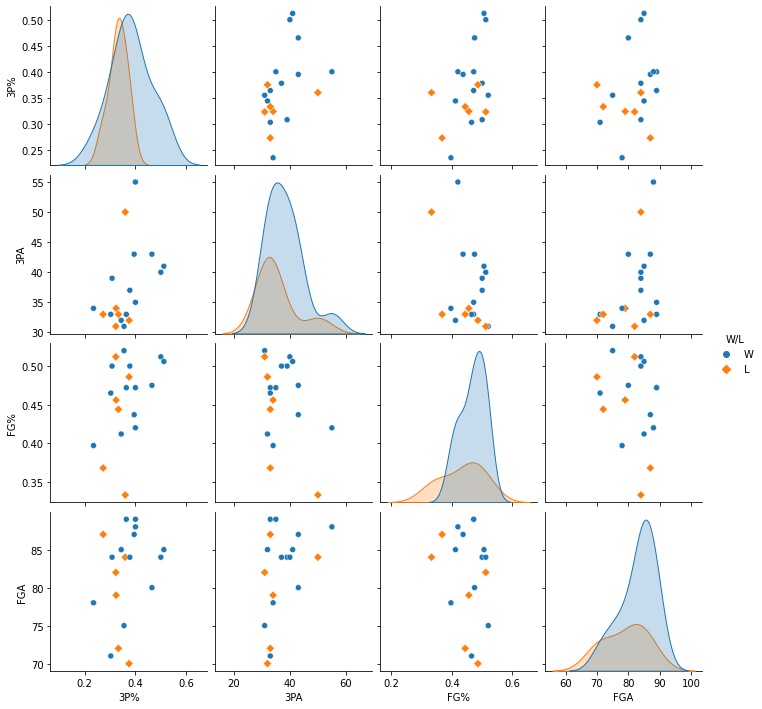

In [289]:
sns.pairplot(Celtics[['W/L', '3P%', '3PA', 'FG%', 'FGA'
]], hue = 'W/L', markers= ["o", "D"]) 

Here we have clustered this data based on Wins and Losses in order to address the following questions

Question 1: Does either team win more when they shoot better from 3? How about Free throws or True shooting percentage? (TS% takes into account the worth of each shot; 3 pointers are weighted heavier compared to free throws, thus >100% TS% is possible)

Question 2: Does either team win more when they rebound better offensively?

Question 3: Does either team win more when they total more assists and less turnovers ?

In [290]:
from sklearn.metrics import confusion_matrix, classification_report,  accuracy_score
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create Classifiers

In [291]:
# convert string to int using map

Warriors['W/L'] = Warriors['W/L'].map({'W': 1, 'L': 0})
Celtics['W/L'] = Celtics['W/L'].map({'W': 1, 'L': 0})
Warriors.head()

,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,FG.1,FGA.1,FG%.1,3P.1,3PA.1,3P%.1,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,123,107,43,82,0.524,16,35,0.457,21,29,0.724,10,41,33,5,8,12,22,43,93,0.462,11,35,0.314,10,13,0.769,9,35,26,8,3,10,22
1,1,126,106,46,84,0.548,17,40,0.425,17,24,0.708,6,35,27,10,8,9,20,37,87,0.425,13,36,0.361,19,21,0.905,17,47,20,4,4,16,25
2,1,118,113,41,74,0.554,18,40,0.450,18,28,0.643,4,30,29,7,6,16,25,40,80,0.500,11,26,0.423,22,27,0.815,11,44,25,9,3,17,26
3,0,121,126,43,86,0.500,12,34,0.353,23,32,0.719,9,36,26,15,3,15,27,41,73,0.562,15,31,0.484,29,36,0.806,5,33,28,9,2,20,31
4,1,102,98,37,82,0.451,13,31,0.419,15,21,0.714,6,37,28,10,6,9,22,36,81,0.444,6,29,0.207,20,29,0.690,14,50,26,5,5,14,21


In [292]:
# Warriors training Data Outline

warriors_train, warriors_test = train_test_split(Warriors, test_size = .2)
warriors_train_features = warriors_train.iloc[:,3:9]
warriors_train_targ = warriors_train[['W/L']]

# This is what our training data will be
warriors_train_features.head(7)

,FG,FGA,FG%,3P,3PA,3P%
16,39,88,0.443,19,45,0.422
13,38,81,0.469,11,32,0.344
0,43,82,0.524,16,35,0.457
6,40,95,0.421,7,38,0.184
14,41,84,0.488,10,28,0.357
15,45,88,0.511,14,36,0.389
12,46,82,0.561,14,28,0.500


**Training Column**

In [293]:
warriors_train_targ

,W/L
16,0
13,1
0,1
6,0
14,0
15,1
12,1
9,0
1,1
4,1


In [294]:
# Create Training Test Data

X = Warriors.drop(['W/L', 'Tm','Opp.1', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FG.1','FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'], axis = 1)
Y = Warriors['W/L']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

# Create Model

Model = tree.DecisionTreeClassifier()
Model.fit(X_train, Y_train)
Y_predict = Model.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



/home/nateackerman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nateackerman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nateackerman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [295]:
# Celtics training Data Outline
"""
celtics_train, celtics_test = train_test_split(Celtics, test_size = .2)
celtics_train_features = celtics_train.iloc[:,3:9]
celtics_train_targ = celtics_train[['W/L']]
"""

"\nceltics_train, celtics_test = train_test_split(Celtics, test_size = .2)\nceltics_train_features = celtics_train.iloc[:,3:9]\nceltics_train_targ = celtics_train[['W/L']]\n"

In [296]:
X = Celtics.drop(['W/L', 'Tm','Opp.1', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FG.1','FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'], axis = 1)
Y = Celtics['W/L']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

Model = tree.DecisionTreeClassifier()
Model.fit(X_train, Y_train)
Y_predict = Model.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



/home/nateackerman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nateackerman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nateackerman/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Pulling Regular Season Data into DataFrames**

In [297]:
reg_season_Warriors = pd.read_csv('regular_season/reg_season_Warriors.csv')
reg_season_Celtics = pd.read_csv('regular_season/reg_season_Celtics.csv')
reg_season_Warriors.head()
reg_season_Celtics.head()

,Rk,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Unnamed: 24,FG.1,FGA.1,FG%.1,3P.1,3PA.1,3P%.1,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,1,2021-10-20,@,NYK,L,134,138,48,117,0.410,21,57,0.368,17,23,0.739,15,56,34,13,9,18,24,NaN,51,105,0.486,17,45,0.378,19,27,0.704,7,55,27,9,10,17,22
1,2,2,2021-10-22,NaN,TOR,L,83,115,32,82,0.390,11,34,0.324,8,11,0.727,10,42,19,6,12,25,19,NaN,42,100,0.420,10,35,0.286,21,21,1.000,21,60,22,16,2,11,13
2,3,3,2021-10-24,@,HOU,W,107,97,38,86,0.442,15,47,0.319,16,20,0.800,6,43,22,10,6,11,22,NaN,32,75,0.427,14,32,0.438,19,24,0.792,5,40,20,7,4,18,20
3,4,4,2021-10-25,@,CHO,W,140,129,50,101,0.495,19,50,0.380,21,25,0.840,11,53,33,8,9,12,23,NaN,46,103,0.447,19,44,0.432,18,28,0.643,14,52,26,4,6,14,25
4,5,5,2021-10-27,NaN,WAS,L,107,116,37,85,0.435,10,29,0.345,23,28,0.821,10,37,18,9,5,13,21,NaN,43,84,0.512,9,25,0.360,21,29,0.724,11,47,18,8,7,15,20


**Data Cleaning (Again!)**

In [298]:
"""
def clean_data(data):   
    data = data.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24', 'Tm','Opp.1', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FG.1','FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'], inplace = True)
    return data

reg_season_Warriors = clean_data(reg_season_Warriors)
reg_season_Celtics = clean_data(reg_season_Celtics)
reg_season_Warriors
"""

"\ndef clean_data(data):   \n    data = data.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24', 'Tm','Opp.1', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FG.1','FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'], inplace = True)\n    return data\n\nreg_season_Warriors = clean_data(reg_season_Warriors)\nreg_season_Celtics = clean_data(reg_season_Celtics)\nreg_season_Warriors\n"

In [299]:
reg_season_Warriors.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24', 'Tm','Opp.1', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FG.1','FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'], inplace = True)
reg_season_Celtics.drop(columns=['Date', 'Unnamed: 3', 'Opp', 'Rk', 'G', 'Unnamed: 24', 'Tm','Opp.1', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','FG.1','FGA.1', 'FG%.1', '3P.1', '3PA.1', '3P%.1', 'FT.1', 'FTA.1', 'FT%.1', 'ORB.1', 'TRB.1', 'AST.1', 'STL.1', 'BLK.1', 'TOV.1', 'PF.1'], inplace = True)

# convert string to int using map

reg_season_Warriors['W/L'] = reg_season_Warriors['W/L'].map({'W': 1, 'L': 0})
reg_season_Celtics['W/L'] = reg_season_Celtics['W/L'].map({'W': 1, 'L': 0})
reg_season_Warriors

,W/L,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%
0,1,41,93,0.441,14,39,0.359,25,30,0.833
1,1,43,83,0.518,15,31,0.484,14,22,0.636
2,1,43,97,0.443,13,37,0.351,20,24,0.833
3,1,39,83,0.470,14,40,0.350,14,18,0.778
4,0,39,90,0.433,14,40,0.350,9,12,0.750
...,...,...,...,...,...,...,...,...,...,...
77,1,40,84,0.476,20,48,0.417,11,12,0.917
78,1,41,79,0.519,16,34,0.471,11,15,0.733
79,1,51,97,0.526,16,32,0.500,10,10,1.000
80,1,33,81,0.407,8,32,0.250,26,33,0.788


In [300]:
# Create Training Test Data

X = reg_season_Warriors.drop(['W/L'], axis = 1)
Y = reg_season_Warriors['W/L']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

# Create Model

Model = tree.DecisionTreeClassifier()
Model.fit(X_train, Y_train)
Y_predict = Model.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.73      0.80      0.76        10

    accuracy                           0.71        17
   macro avg       0.70      0.69      0.69        17
weighted avg       0.70      0.71      0.70        17



In [301]:
# Create Training Test Data

X = reg_season_Celtics.drop(['W/L'], axis = 1)
Y = reg_season_Celtics['W/L']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

# Create Model

Model = tree.DecisionTreeClassifier()
Model.fit(X_train, Y_train)
Y_predict = Model.predict(X_test)
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.55      0.75      0.63         8

    accuracy                           0.59        17
   macro avg       0.61      0.60      0.58        17
weighted avg       0.61      0.59      0.58        17



In [306]:
def predict_Win_Loss(data=pd.DataFrame):
    X = data.drop(['W/L'], axis = 1)
    Y = data['W/L']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

    # Create Model
    Model = tree.DecisionTreeClassifier()
    Model.fit(X_train, Y_train)
    Y_predict = Model.predict(X_test)
    report = classification_report(Y_test, Y_predict)
    print(report)
    return report


In [311]:
reg_season_Warriors = predict_Win_Loss(reg_season_Warriors)
reg_season_Celtics = predict_Win_Loss(reg_season_Celtics)

AttributeError: 'str' object has no attribute 'drop'